Analysis of notebook 2
----------------------

In notebook 2, we generated a set of reconstructions with various compression ratios, SNR and sparsifying transforms.
Here the aim is to plot the results.

Method:

1. Examine the reconstructions from various noises
2. Look at SSIM/MSE as a function of SNR and compression ratio

In [18]:
## Various imports
%matplotlib inline
from libtiff import TIFF ## Now works with Python 3 !
import matplotlib.pyplot as plt
import numpy as np
import os, sys, time
import pandas
from skimage.measure import structural_similarity as ssim

p_out = "./2_noiseeffect_simu/"

if not os.path.isfile(os.path.join(p_out, "params.npy")):
    raise Exception("Cannot find parameters file!: {}".format("params.npy"))

parameters = pandas.DataFrame(np.load(os.path.join(p_out, "params.npy")), columns=("SNR", "compression", "dict", "ypos", "filename"))

## Define metrics (from http://www.pyimagesearch.com/2014/09/15/python-compare-two-images/)
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    # There is a bijection between PSNR and MSE: PSNR = 10*log(255*255/MSE) / log(10)
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err
# ssim defined in skimage.measure and used as ssim(imageA, imageB)

In [19]:
## Load the data (heavy)
data = []
for (i,p) in enumerate(parameters['filename']):
    data.append(np.load(os.path.join(p_out,p)).item())
    if i%500 == 0:
        print "{}/{}".format(i+1,parameters.shape[0])
print "Done!"

1/2640
501/2640
1001/2640
1501/2640
2001/2640
2501/2640
Done!


## 1. Plot reconstructions

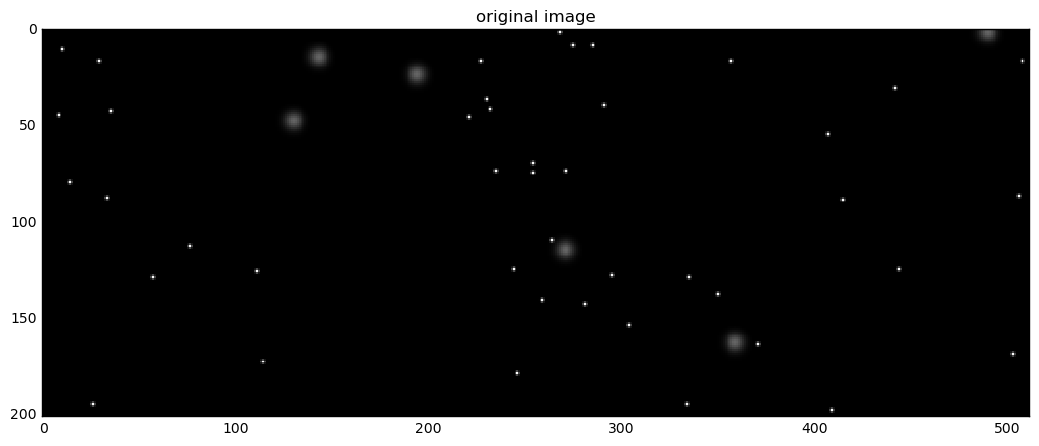

In [20]:
plt.figure(figsize=(18,5))
plt.imshow([i for i in data if i['ypos']==125][22]['original'], cmap='gray', interpolation='none')
plt.title("original image")

plt.savefig("2d.original_image.pdf")

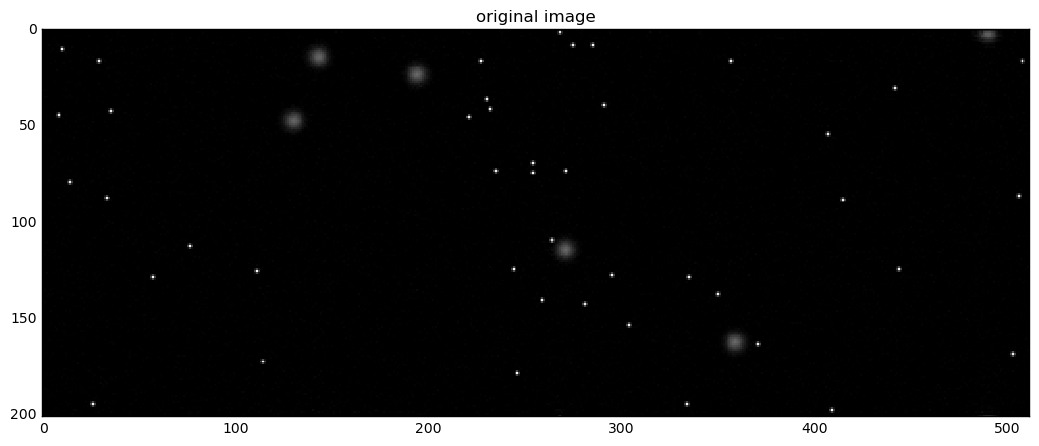

In [21]:
plt.figure(figsize=(18,5))
plt.imshow([i for i in data if i['ypos']==125][22]['reconstruction'], cmap='gray', interpolation='none')
plt.title("original image")

plt.savefig("2d.original_image_rec.pdf")

/home/maxime/.local/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/maxime/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/maxime/.local/lib/python2.7/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


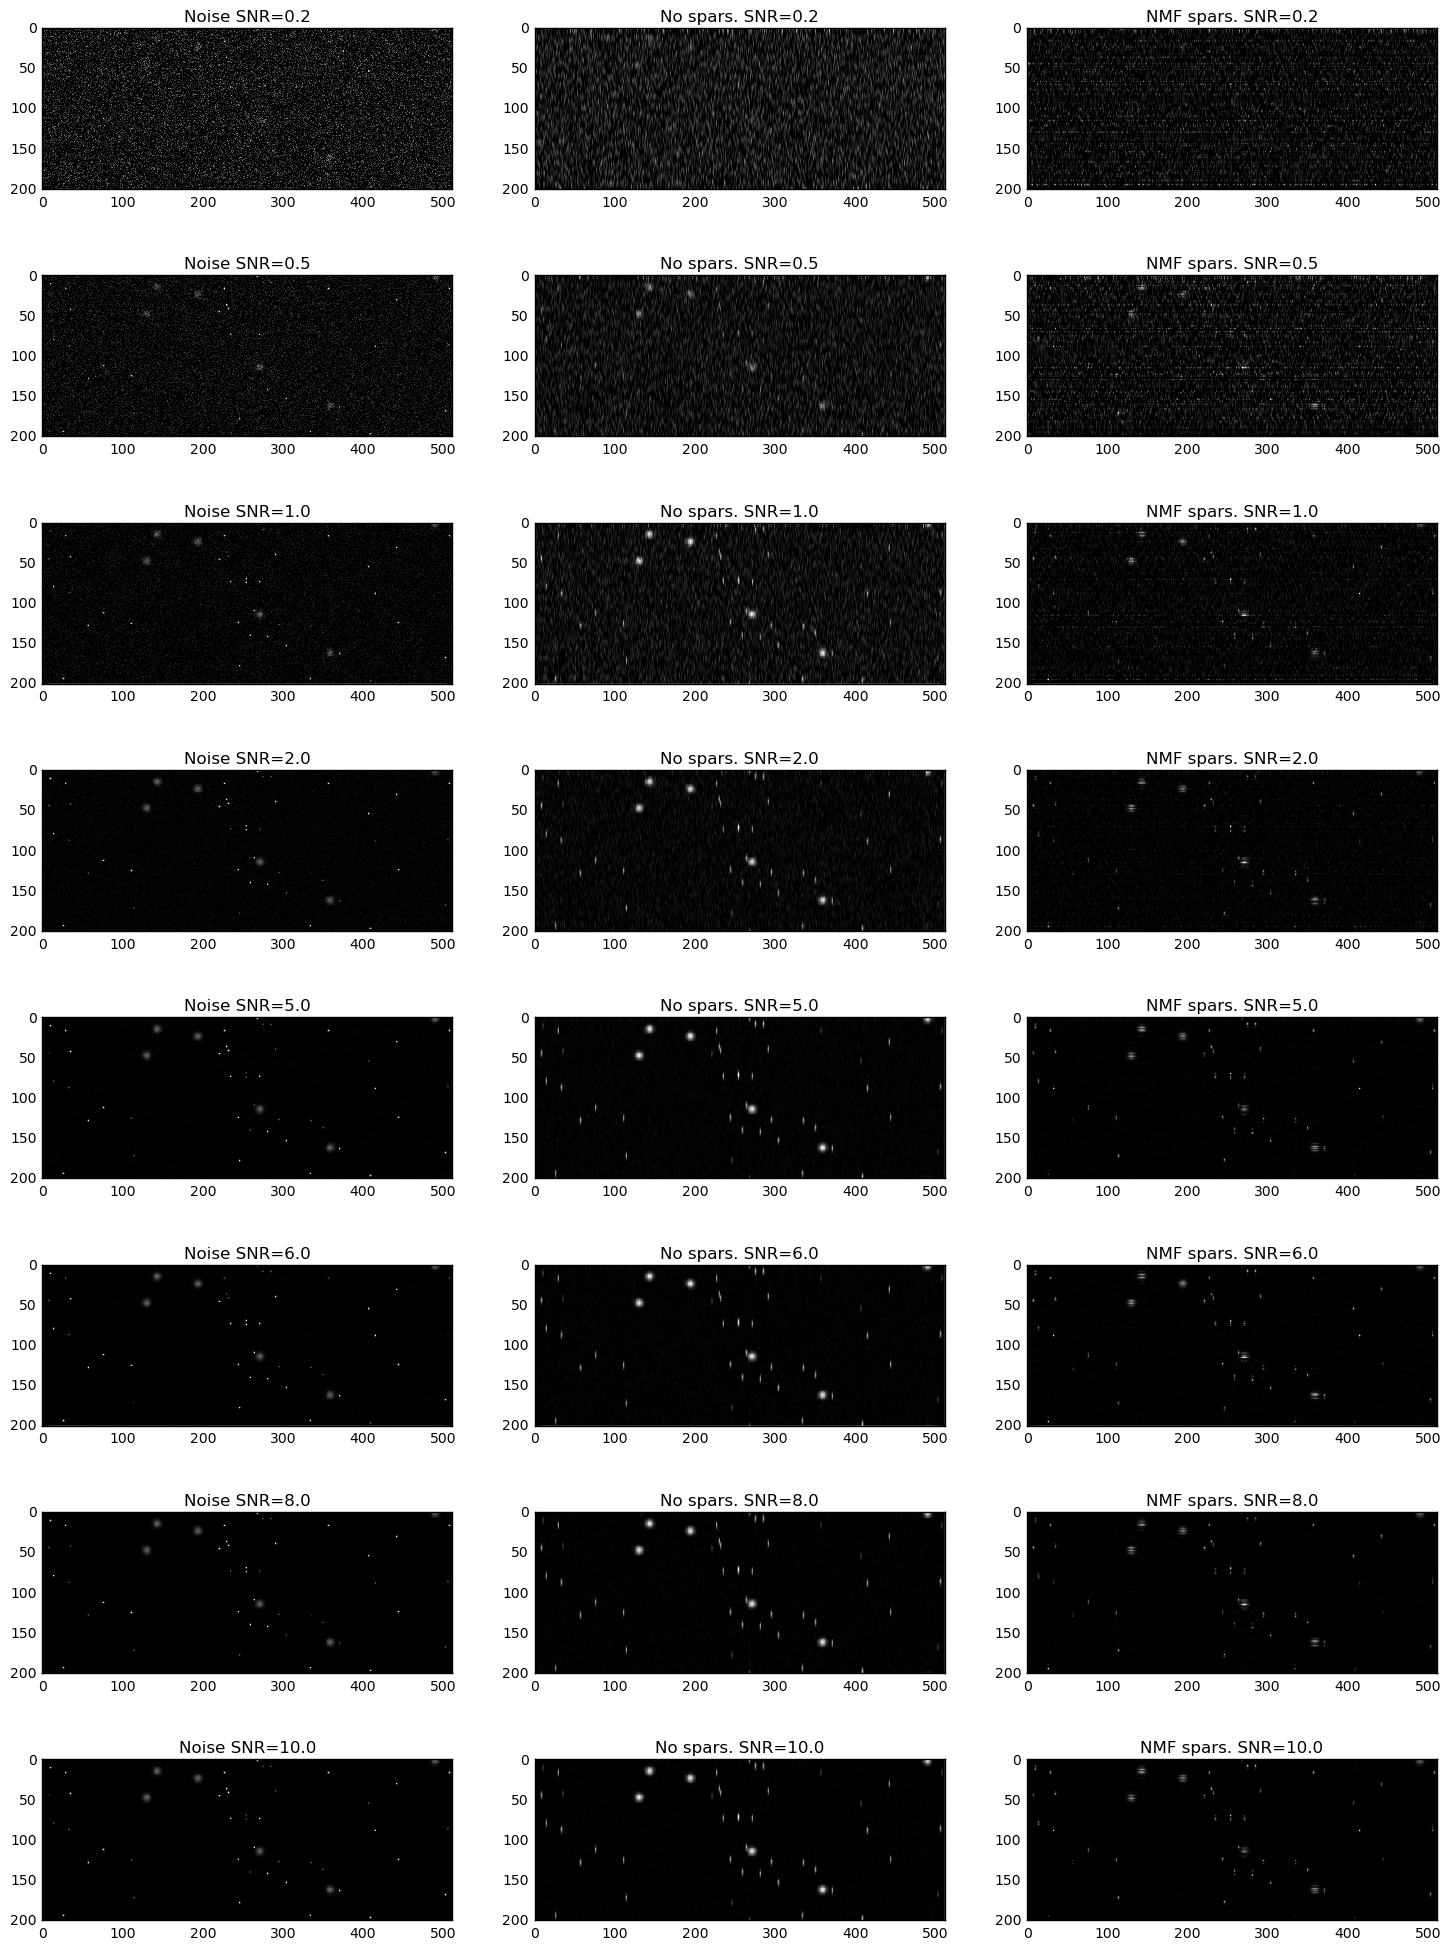

In [22]:
## Reconstructions with increasing SNRs

plt.figure(figsize=(18,25))
incr_snr_non = parameters[parameters.ypos == 125][parameters.compression == 6][parameters.dict == "none"]
incr_snr_psf = parameters[parameters.ypos == 125][parameters.compression == 6][parameters.dict == "psf"]
incr_snr_nmf = parameters[parameters.ypos == 125][parameters.compression == 6][parameters.dict == "nmf"]

for (i,jj) in enumerate(zip(incr_snr_non.index, incr_snr_psf.index, incr_snr_nmf.index)):
    j = jj[0]
    k = jj[1]
    l = jj[2]
    
    plt.subplot(incr_snr_non.shape[0],3,3*i+1)
    plt.imshow(data[j]['noisy'], cmap='gray', interpolation='none')
    plt.title("Noise SNR={}".format(list(incr_snr_non['SNR'])[i]))
    
    plt.subplot(incr_snr_non.shape[0],3,3*i+2)
    plt.imshow(data[k]['reconstruction'], cmap='gray', interpolation='none')
    plt.title("No spars. SNR={}".format(list(incr_snr_non['SNR'])[i]))
    
    plt.subplot(incr_snr_non.shape[0],3,3*i+3)
    plt.imshow(data[l]['reconstruction'], cmap='gray', interpolation='none')
    plt.title("NMF spars. SNR={}".format(list(incr_snr_nmf['SNR'])[i])) 

plt.savefig("2d.sample_reconstructions.pdf")

## 3. Examine raw SNR

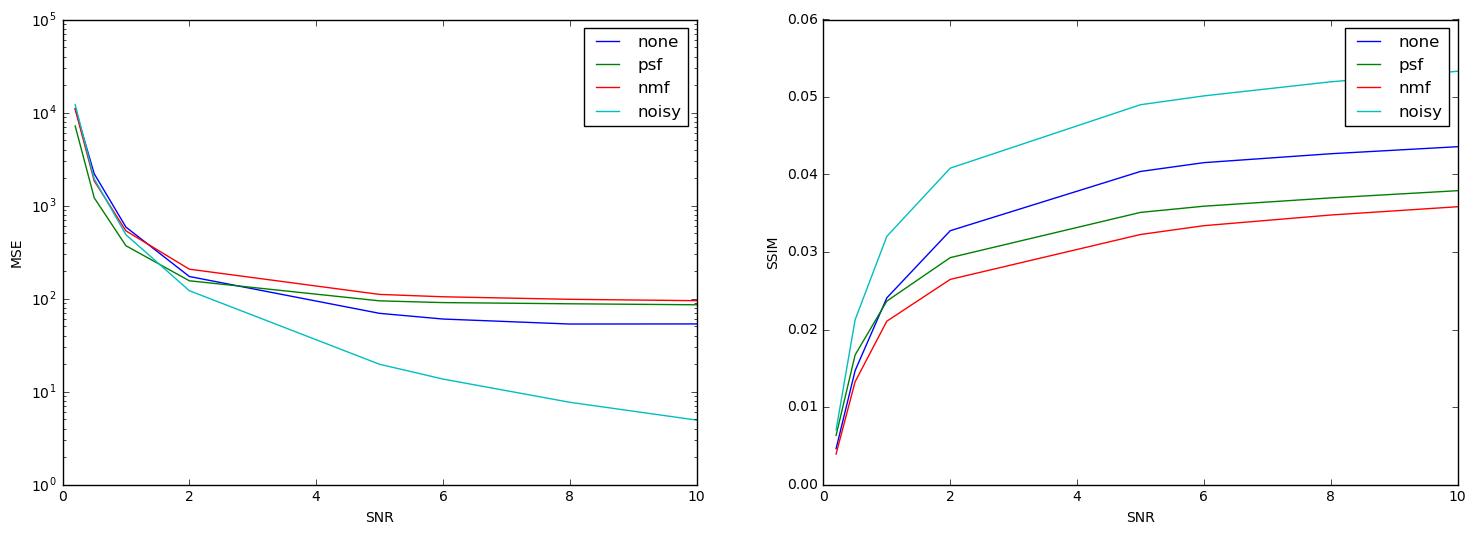

In [23]:
plt.figure(figsize=(18,6))

ax = plt.subplot(121)
x=[i[1].SNR for i in incr_snr_non.iterrows()]
y1=[data[i[0]]['mse'] for i in incr_snr_non.iterrows()]
y2=[data[i[0]]['mse'] for i in incr_snr_psf.iterrows()]
y3=[data[i[0]]['mse'] for i in incr_snr_nmf.iterrows()]
y4=[mse(data[i[0]]['original'], data[i[0]]['noisy']) for i in incr_snr_nmf.iterrows()]

plt.plot(x,y1, label='none')
plt.plot(x,y2, label='psf')
plt.plot(x,y3, label='nmf')
plt.plot(x,y4, label='noisy')


ax.set_yscale('log')
plt.xlabel("SNR")
plt.ylabel("MSE")
plt.legend()

plt.subplot(122)
y1=[data[i[0]]['ssim'] for i in incr_snr_non.iterrows()]
y2=[data[i[0]]['ssim'] for i in incr_snr_psf.iterrows()]
y3=[data[i[0]]['ssim'] for i in incr_snr_nmf.iterrows()]
y4=[ssim(data[i[0]]['original'], data[i[0]]['noisy']) for i in incr_snr_nmf.iterrows()]


plt.plot(x,y1, label='none')
plt.plot(x,y2, label='psf')
plt.plot(x,y3, label='nmf')
plt.plot(x,y4, label='noisy')
plt.xlabel("SNR")
plt.ylabel("SSIM")
plt.legend()

## 4. Same stuff but with various compression ratios

/home/maxime/.local/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/maxime/.local/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/maxime/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


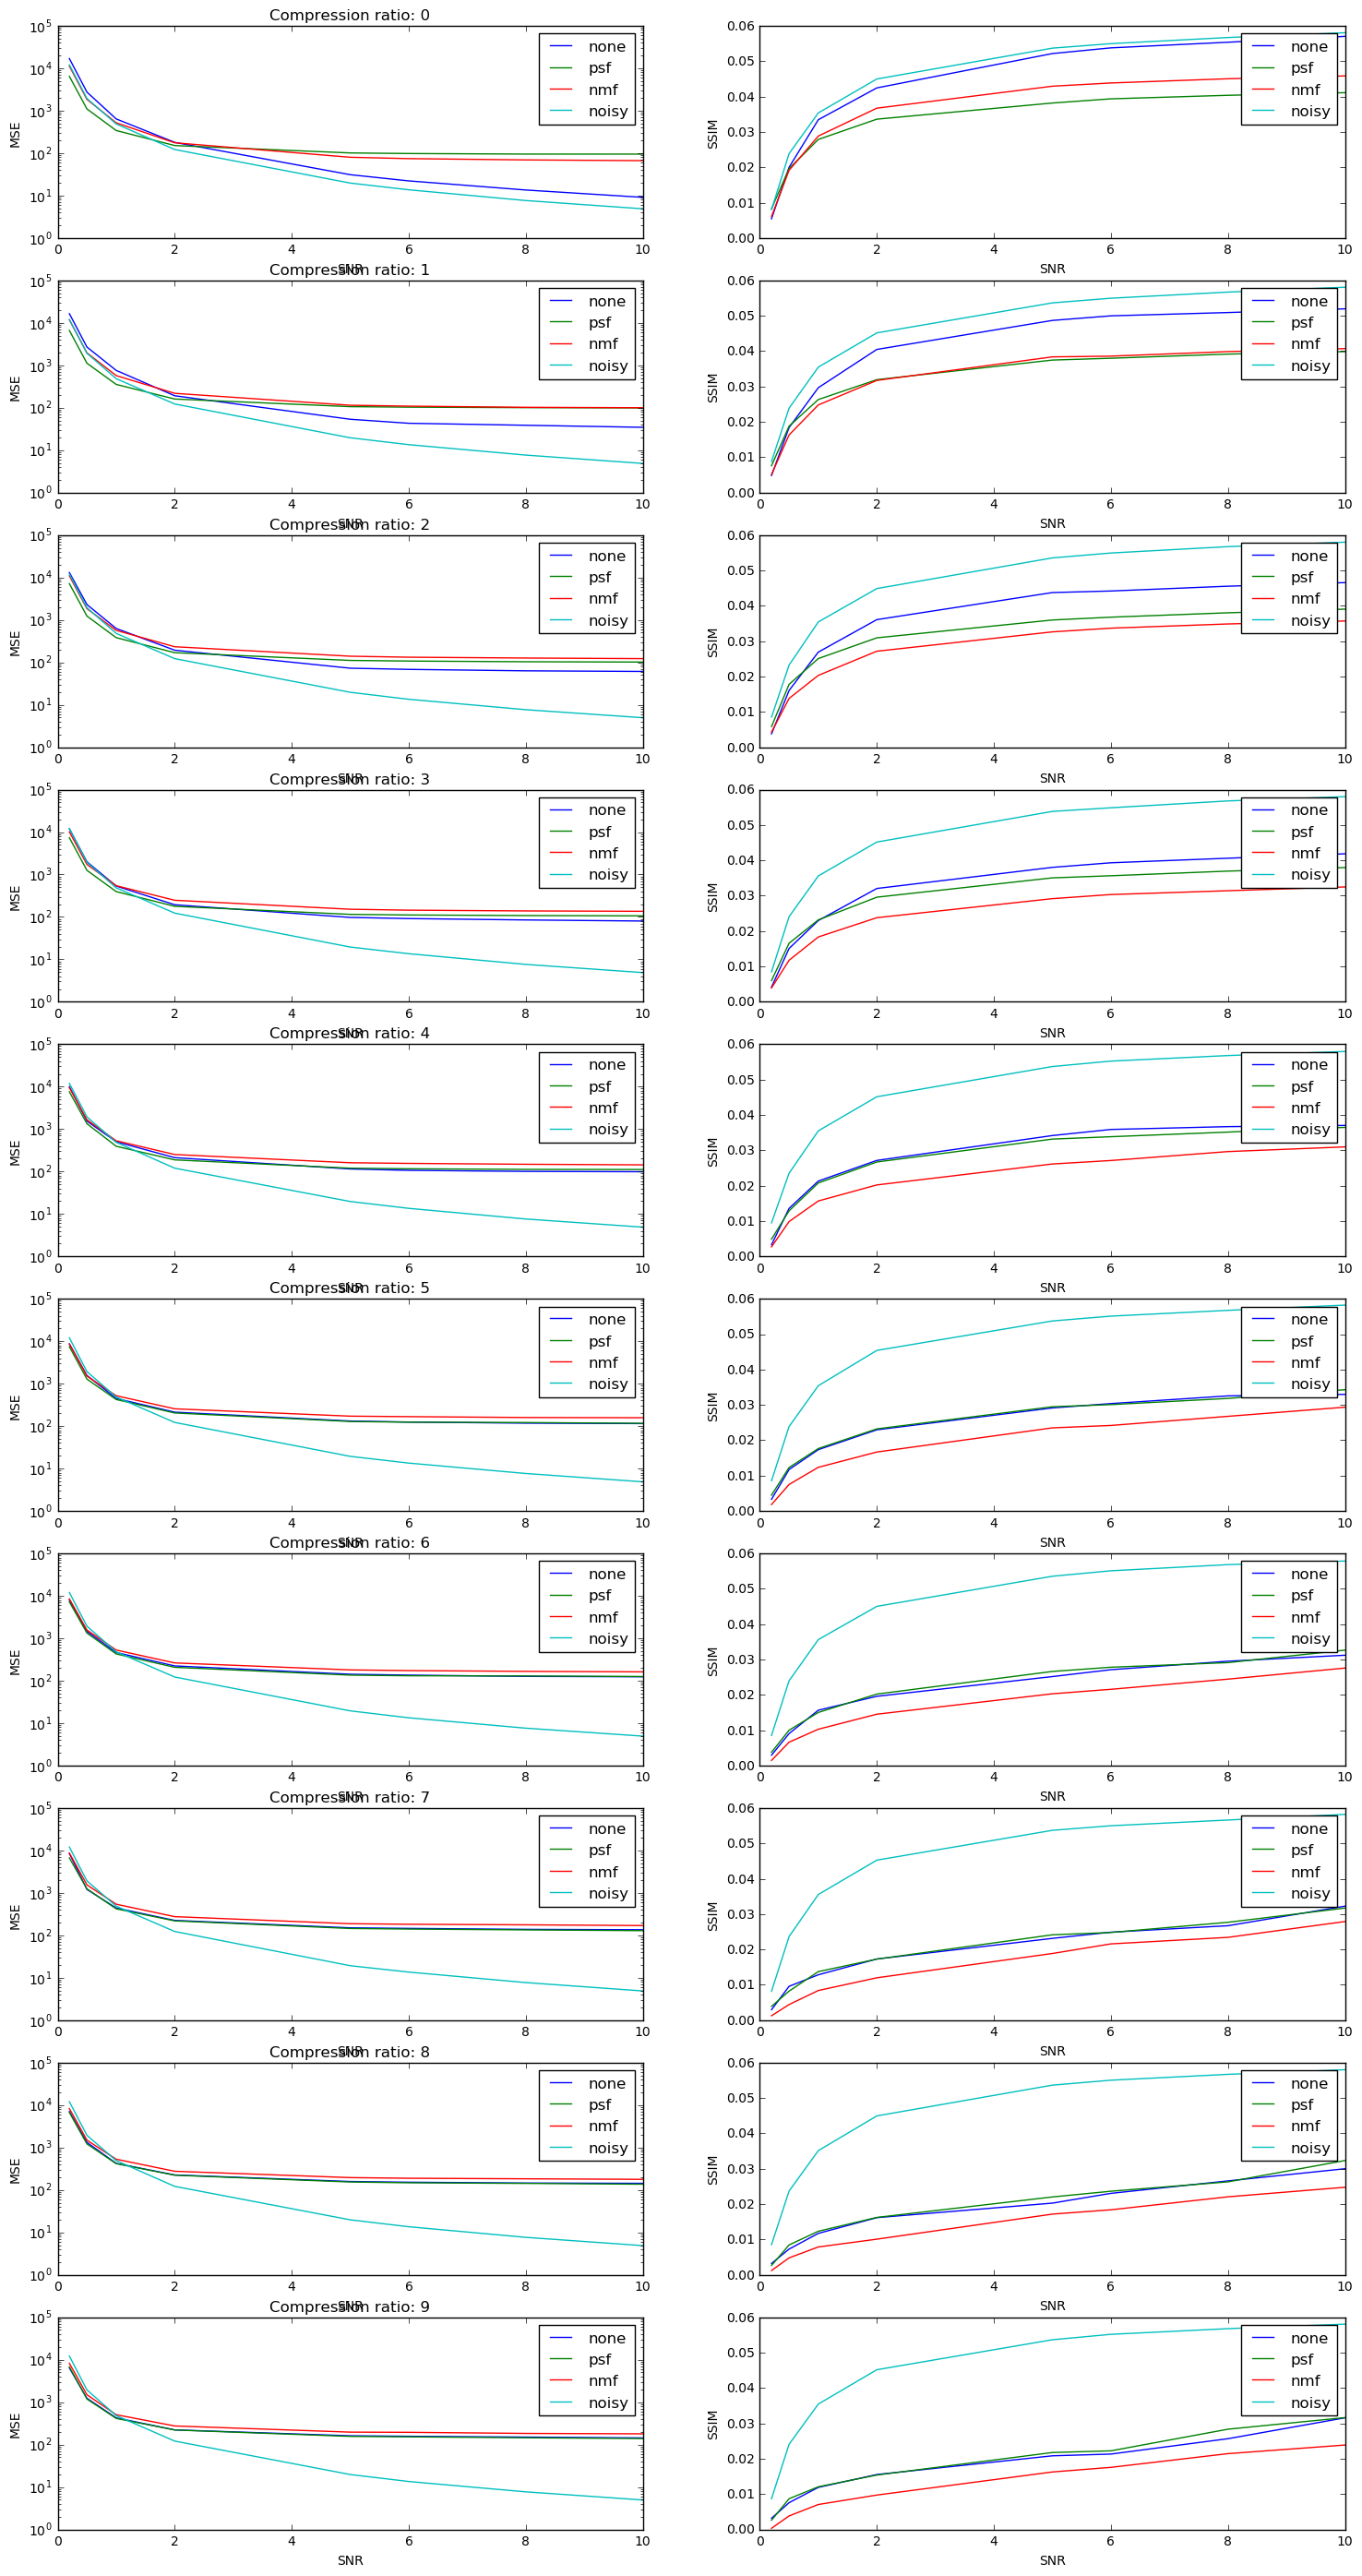

In [24]:
para_comp = parameters.groupby('compression')

plt.figure(figsize=(18,35))

for (j, jj) in enumerate(para_comp):
    (c,da) = jj
    
    i_non = da[da.ypos == 0][da.dict == "none"]
    i_psf = da[da.ypos == 0][da.dict == "psf"]
    i_nmf = da[da.ypos == 0][da.dict == "nmf"]
    

    ax = plt.subplot(len(para_comp), 2, 2*j+1)
    x=[i[1].SNR for i in incr_snr_non.iterrows()]
    y1=[data[i[0]]['mse'] for i in i_non.iterrows()]
    y2=[data[i[0]]['mse'] for i in i_psf.iterrows()]
    y3=[data[i[0]]['mse'] for i in i_nmf.iterrows()]
    y4=[mse(data[i[0]]['original'], data[i[0]]['noisy']) for i in i_nmf.iterrows()]

    plt.plot(x,y1, label='none')
    plt.plot(x,y2, label='psf')
    plt.plot(x,y3, label='nmf')
    plt.plot(x,y4, label='noisy')

    ax.set_yscale('log')
    plt.xlabel("SNR")
    plt.ylabel("MSE")
    plt.legend()
    plt.title("Compression ratio: {}".format(j))

    ax = plt.subplot(len(para_comp), 2, 2*j+2)
    y1=[data[i[0]]['ssim'] for i in i_non.iterrows()]
    y2=[data[i[0]]['ssim'] for i in i_psf.iterrows()]
    y3=[data[i[0]]['ssim'] for i in i_nmf.iterrows()]
    y4=[ssim(data[i[0]]['original'], data[i[0]]['noisy']) for i in i_nmf.iterrows()]

    plt.plot(x,y1, label='none')
    plt.plot(x,y2, label='psf')
    plt.plot(x,y3, label='nmf')
    plt.plot(x,y4, label='noisy')
    plt.xlabel("SNR")
    plt.ylabel("SSIM")
    plt.legend()

## 5. Averaged SNR over many planes

In [25]:
## LOONG -- Extract mse_original and ssim_original
parameters2 = parameters.copy()
parameters2["mse_original"] = [mse(data[i[0]]['original'], data[i[0]]['noisy']) for i in parameters.iterrows()]
parameters2["ssim_original"] = [ssim(data[i[0]]['original'], data[i[0]]['noisy']) for i in parameters.iterrows()]
parameters2["mse"] = [data[i[0]]['mse'] for i in parameters.iterrows()]
parameters2["ssim"] = [data[i[0]]['ssim'] for i in parameters.iterrows()]

In [14]:
da_me = parameters2.groupby(['compression', 'SNR', 'dict']).mean()
da_sd = parameters2.groupby(['compression', 'SNR', 'dict']).std()

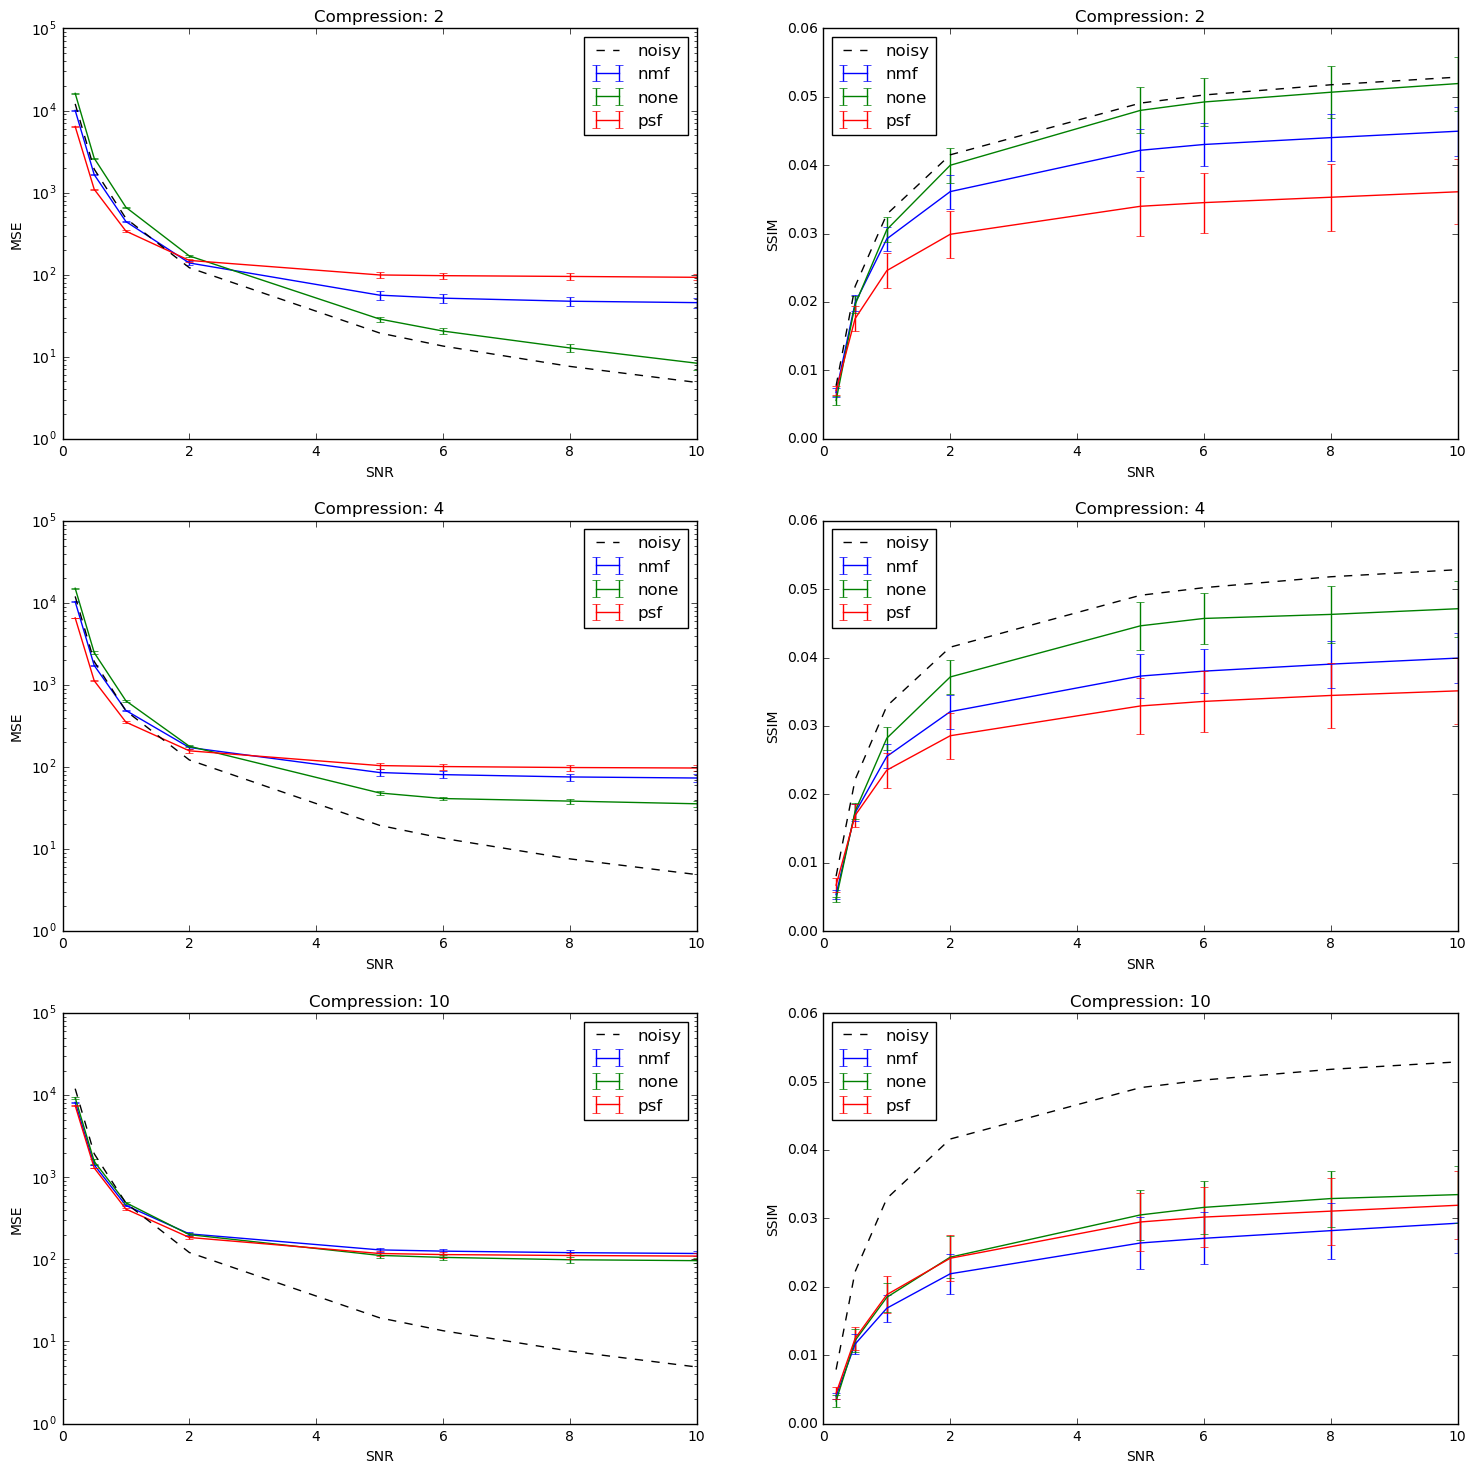

In [16]:
plt.figure(figsize=(18,18))

split1 = da_me.reset_index()
split1 = split1[split1.compression.isin((2,4,10))].groupby('compression')
split2 = da_sd.reset_index()
split2 = split2[split2.compression.isin((2,4,10))].groupby('compression')

for (j, jj) in enumerate(zip(split1, split2)):
    (me1, sd1) = jj
    (c, da1) = me1
    (c, da2) = sd1
    ax = plt.subplot(len(split1), 2, 2*j+1)
    for kk in zip(da1.groupby('dict'), da2.groupby('dict')):
        (daa1, daa2) = kk
        (d, daa) = daa1
        #plt.plot(daa['SNR'], daa['mse'], label=d)
        plt.errorbar(daa['SNR'], daa['mse'], yerr=np.asarray(daa2[1]['mse']), label=d)
    plt.plot(daa['SNR'], daa['mse_original'], '--', label='noisy', color='black')
    ax.set_yscale('log')
    plt.xlabel('SNR')
    plt.ylabel('MSE')
    plt.legend()
    plt.title("Compression: {}".format(c))
    
    plt.subplot(len(split1), 2, 2*j+2)
    for kk in zip(da1.groupby('dict'), da2.groupby('dict')):
        (daa1, daa2) = kk
        (d, daa) = daa1
        plt.errorbar(daa['SNR'], daa['ssim'], yerr=np.asarray(daa2[1]['ssim']), label=d)
    plt.plot(daa['SNR'], daa['ssim_original'], '--', label='noisy', color='black')
    plt.xlabel('SNR')
    plt.ylabel('SSIM')
    plt.legend(loc="upper left")
    plt.title("Compression: {}".format(c))
    
plt.savefig("./2d.effect_of_noise.pdf")

**A quick conclusion:** On simulated images, this is shit. But this is a beautiful graph anyway. Be very precise about the fact that the SNR is computed weirdly.

## 6. See how the MSE/SSIM evolves with the compression ratio

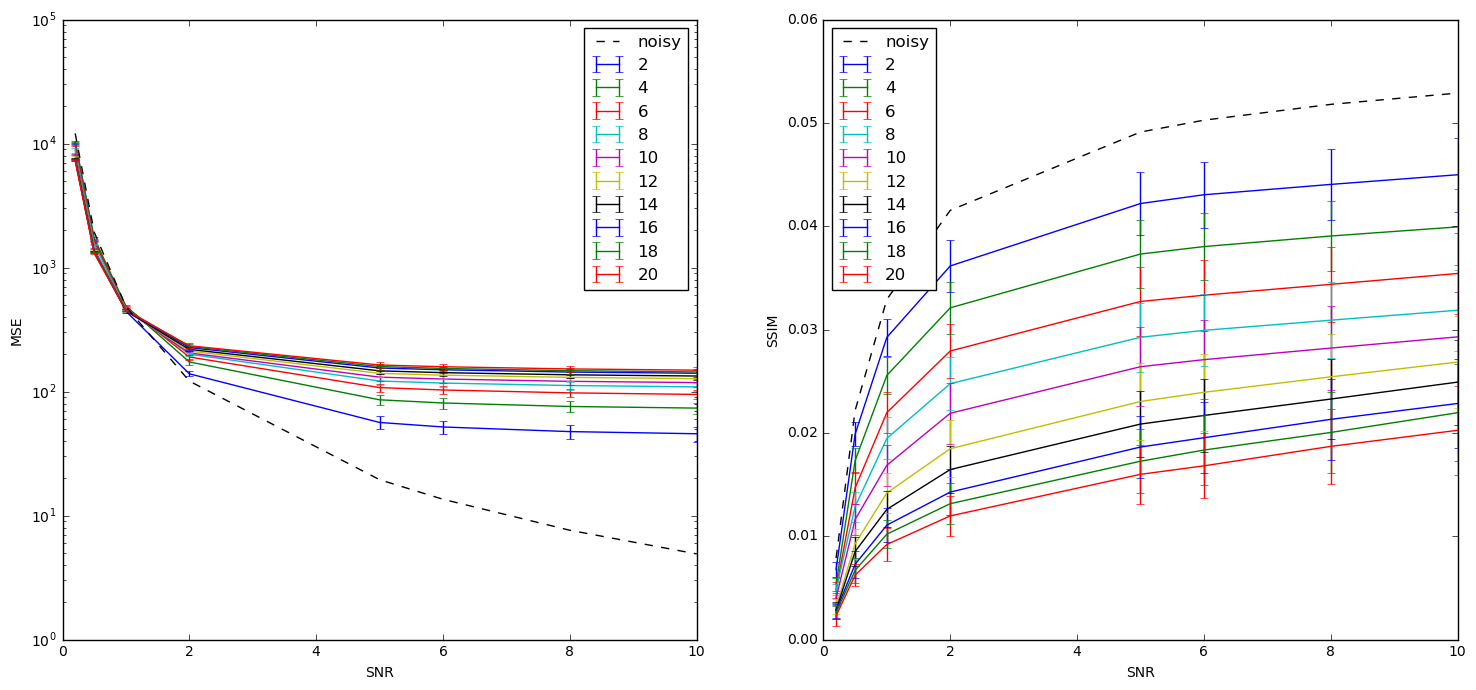

In [17]:
plt.figure(figsize=(18,8))

split1 = da_me.reset_index()
split1 = split1[split1.dict=="nmf"].groupby('compression')
split2 = da_sd.reset_index()
split2 = split2[split2.dict=="nmf"].groupby('compression')

ax = plt.subplot(1, 2, 1)
for (j, jj) in enumerate(zip(split1, split2)):
    (me1, sd1) = jj
    (c, da1) = me1
    (c, da2) = sd1
    plt.errorbar(da1['SNR'], da1['mse'], yerr=np.asarray(da2['mse']), label=c)
plt.plot(da1['SNR'], da1['mse_original'], '--', label='noisy', color='black')
ax.set_yscale('log')
plt.xlabel('SNR')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
for (j, jj) in enumerate(zip(split1, split2)): 
    (me1, sd1) = jj
    (c, da1) = me1
    (c, da2) = sd1    
    plt.errorbar(da1['SNR'], da1['ssim'], yerr=np.asarray(da2['ssim']), label=c)
plt.plot(da1['SNR'], da1['ssim_original'], '--', label='noisy', color='black')
plt.xlabel('SNR')
plt.ylabel('SSIM')
plt.legend(loc="upper left")

**Conclusion:** There is a clear trade-off between the compression ratio and the quality of the reconstruction, provided a given SNR. However, the methods become more and more interesting for low-SNR conditions.